In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
from tqdm import tqdm
from lmfit import Model
%matplotlib widget

In [2]:
def randomWalk(tStart: float, tEnd: float, tStep: float, spatialStepSize: float) -> np.ndarray:
    t = np.arange(tStart, tEnd+tStep, tStep)
    Pos = []
    pbar = tqdm(total = len(t) - 1)

    genInitPos = True
    generatePath =0

    while genInitPos == True:
        posInitX = 10#np.random.uniform(low = -100, high = 100)
        posInitY = 10#np.random.uniform(low = -100, high = 100)
        posInitZ = 10#np.random.uniform(low = -40, high = 40)
        if posInitX**2 + posInitY**2 < 300:
            Pos.append([posInitX, posInitY, posInitZ])
            genInitPos = False

    while generatePath < len(t) - 1:
        stepX = np.random.normal(loc = 0.0, scale = spatialStepSize)
        stepY = np.random.normal(loc = 0.0, scale = spatialStepSize)
        stepZ = np.random.normal(loc = 0.0, scale = spatialStepSize)
        currentStep = np.array(Pos[-1])
        if (np.sqrt((currentStep[0] + stepX)**2 + (currentStep[1] + stepY)**2) < 300) and (currentStep[2] + stepZ > -90) and (currentStep[2] + stepZ < 90):
            pbar.update(1)
            step = np.array([stepX, stepY, stepZ])
            newPos = currentStep + step
            Pos.append(newPos.tolist())
            generatePath += 1
    
    path = np.c_[t, Pos]
    return np.array(path).astype(np.float32)

In [3]:
np.random.seed(675894)

In [4]:
tStart = -0.0003
tEnd = 0.5003
tStep = 0.0001
spatialStepSize = 1.0
path = randomWalk(tStart = tStart, tEnd = tEnd, tStep = tStep, spatialStepSize = spatialStepSize)

  0%|                                                                                                                                               | 0/5006 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5006/5006 [00:00<00:00, 57261.76it/s]


In [22]:
# def multipleRandomWalks(tStepRange: np.ndarray, SpatialStepSize: float, outPath: str) -> None:
#     tStart = 0.0
#     tEnd = 0.5000
#     for i in range(len(tStepRange)):
#         walk = randomWalk(tStart = tStart, tEnd = tEnd, tStep = tStepRange[i]*1e-3, spatialStepSize = SpatialStepSize)
#         np.save(outPath + "RW_Sigma_{:.2f}mm_TS_{:.2f}ms".format(spatialStepSize, tStepRange[i]), arr = walk)


In [23]:
# tStepRange = np.array([0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
# spatialStepSize = 2.0 
# outPath = "/home/rayhaan/randomWalk_V3/GATE_Generation/Sigma_2.0mm_Tau_0.08ms_1.2ms_npy/"

In [5]:
# multipleRandomWalks(tStepRange = tStepRange, SpatialStepSize = spatialStepSize, outPath = outPath)

In [5]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


In [6]:
x_smooth = smooth(path[:, 1], 4)
y_smooth = smooth(path[:, 2], 4)
z_smooth = smooth(path[:, 3], 4)
path = np.array([path[:, 0][3:-2].tolist(), x_smooth[3:-2].tolist(), y_smooth[3:-2].tolist(), z_smooth[3:-2].tolist()]).T


In [7]:
# np.save("/home/rayhaan/TimingInvestigations/TimingInvestigations/generatedPaths/TS_0.1ms_SS_1.0_randomWalk", arr = path)

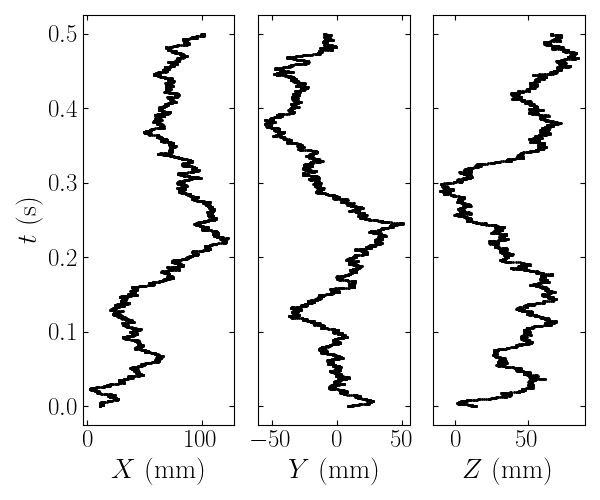

In [11]:
plt.close("all")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (6, 5))

s = 20

ax1.scatter(path[:, 1], path[:, 0], s = 1, color = 'k')
ax2.scatter(path[:, 2], path[:, 0], s = 1, color = 'k')
ax3.scatter(path[:, 3], path[:, 0], s = 1, color = 'k')

ax1.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax1.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax2.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax2.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax3.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax3.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)

ax1.tick_params(axis="x", labelsize = s - 2) 
ax1.tick_params(axis="y", labelsize = s - 2)
ax2.tick_params(axis="x", labelsize = s - 2) 
ax2.tick_params(axis="y", labelsize = s - 2)
ax3.tick_params(axis="x", labelsize = s - 2) 
ax3.tick_params(axis="y", labelsize = s - 2) 

ax1.set_ylabel(r"$t$ (s)", fontsize = s)
ax1.set_xlabel(r"$X$ (mm)", fontsize = s)
ax2.set_xlabel(r"$Y$ (mm)", fontsize = s)
ax3.set_xlabel(r"$Z$ (mm)", fontsize = s)

fig.tight_layout()
fig.align_ylabels()
fig.savefig("/home/rayhaan/randomWalk_V2/Plots/RandomWalkExample.png", dpi = 300)